In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset

combined_df = pd.merge( ride_data,city_data,
                                 how='left', on='city')
# Display the data table for preview
combined_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

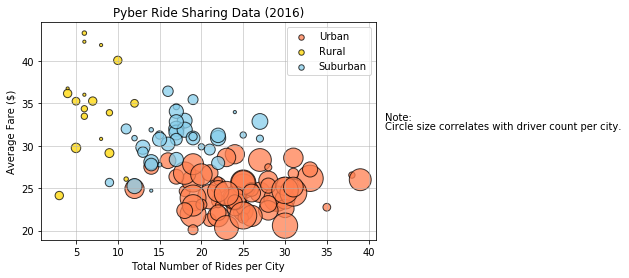

In [2]:
# Obtain the x and y coordinates for each of the three city types
combined_urban=combined_df[combined_df["type"]=="Urban"]

info_df = combined_urban.groupby(['city'])

info_dict = {   "Rides": info_df["ride_id"].count(),
                "Fare": info_df["fare"].mean(),
                "Driver": info_df["driver_count"].mean()}
info_urban = pd.DataFrame.from_dict(info_dict,orient='columns')                 

urban_rides = info_urban["Rides"]
urban_fare = info_urban["Fare"]
urban_driver = info_urban["Driver"]

combined_rural=combined_df[combined_df["type"]=="Rural"]

info_df = combined_rural.groupby(['city'])

info_dict = {   "Rides": info_df["ride_id"].count(),
                "Fare": info_df["fare"].mean(),
                "Driver": info_df["driver_count"].mean() }
info_rural = pd.DataFrame.from_dict(info_dict,orient='columns')   


rural_rides = info_rural["Rides"]
rural_fare = info_rural["Fare"]
rural_driver = info_rural["Driver"]

combined_suburban=combined_df[combined_df["type"]=="Suburban"]

info_df = combined_suburban.groupby(['city'])

info_dict = {   "Rides": info_df["ride_id"].count(),
                "Fare": info_df["fare"].mean(),
                "Driver": info_df["driver_count"].mean() }
info_sub = pd.DataFrame.from_dict(info_dict,orient='columns')   

sub_rides = info_sub["Rides"]
sub_fare = info_sub["Fare"]
sub_driver = info_sub["Driver"]

#print(info_sub)

# Build the scatter plots for each city types

plt.scatter(urban_rides, urban_fare, marker="o", facecolors="coral", edgecolors="black", alpha = .75,s=urban_driver*10,label="Urban")
plt.scatter(rural_rides, rural_fare, marker="o", facecolors="gold", edgecolors="black",  alpha = .75, s=rural_driver*10 ,label="Rural")
plt.scatter(sub_rides, sub_fare, marker="o", facecolors="skyblue", edgecolors="black", alpha = .75, s=sub_driver*10, label="Suburban")



# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid( linestyle='-', linewidth=1,alpha =.5)
# Create a legend

lgnd= plt.legend()


#lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 33,"Note:")
plt.text(42, 32,"Circle size correlates with driver count per city.")
# Save Figure
plt.show()

## Total Fares by City Type

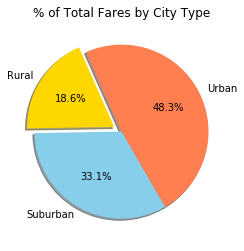

In [26]:
# Calculate Type Percents
total_fare = rural_fare.sum()+urban_fare.sum()+sub_fare.sum()
percent_urban_fare = urban_fare.sum()/total_fare*100
percent_rural_fare = rural_fare.sum()/total_fare*100
percent_sub_fare = sub_fare.sum()/total_fare*100


percent = [percent_urban_fare, percent_rural_fare, percent_sub_fare]
pct_label = ["Urban","Rural","Suburban"]
colors = ["coral", "gold", "skyblue"]
explode = (0,.1,0)

#Build Pie Chart

plt.pie(percent,labels=pct_label, colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=300)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/PyFarePies.png")
plt.show()

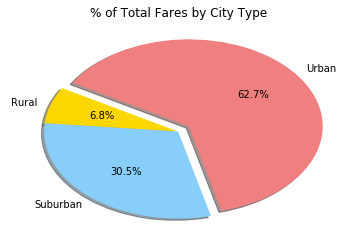

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

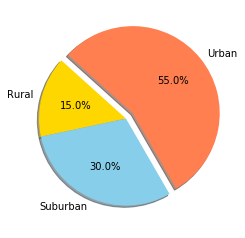

In [23]:
# Calculate Ride Percents
total_rides = rural_rides.count()+urban_rides.count()+sub_rides.count()
percent_urban = urban_rides.count()/total_rides*100
percent_rural = rural_rides.count()/total_rides*100
percent_sub = sub_rides.count()/total_rides*100


percent = [percent_urban, percent_rural, percent_sub]
pct_label = ["Urban","Rural","Suburban"]
colors = ["coral", "gold", "skyblue"]
explode = (.1,0,0)

#Build Pie Chart

plt.pie(percent,labels=pct_label, colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=300)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/PyRidePie.png")

plt.show()

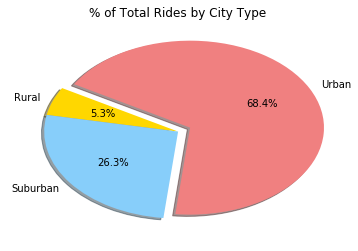

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

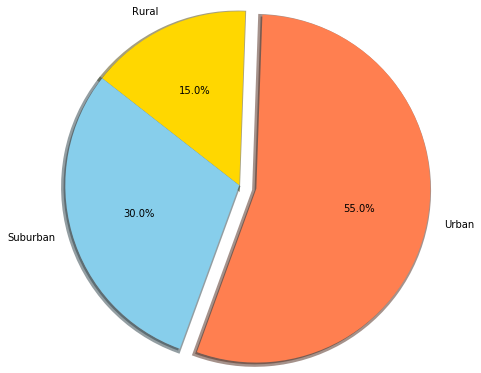

In [24]:
# Calculate Driver Percents

total_driver = rural_driver.count()+urban_driver.count()+sub_driver.count()
percent_urban_driver = urban_driver.count()/total_driver*100
percent_rural_driver = rural_driver.count()/total_driver*100
percent_sub_driver = sub_driver.count()/total_driver*100

# Build Pie Charts
percent = [percent_urban_driver, percent_rural_driver, percent_sub_driver]
pct_label = ["Urban","Rural","Suburban"]
colors = ["coral", "gold", "skyblue"]
explode = (0.2,0,0)


plt.pie(percent,labels=pct_label, colors=colors, autopct="%1.1f%%", explode=explode,radius =2, wedgeprops = {'linewidth': 5}, shadow=True, startangle=250)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/PyDriverPie.png")

plt.show()

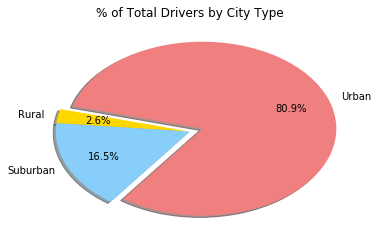

In [6]:
# Show Figure
plt.show()